<a href="https://colab.research.google.com/github/shivamswarnkar/Image-Classifier/blob/master/downloading_dataset_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

In this notebook I'll download Cat-Dog dataset from kaggle. I'll setup the api files and manage the downloaded files. 

# Setting Up Kaggle API

In [4]:
!pip install kaggle
!mkdir .kaggle 

In [0]:
import json
token = {"username":"YOUR-USERNAME", "key":"YOUR-API-KEY"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [8]:
# If you get error, try to run one more time after few seconds. 
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
# make not readable, fixing the previous warning
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           8265  
matheusfreitag/gas-prices-in-brazil                         Gas Prices in Brazil                                  3MB  2019-07-12 16:23:52           4639  
jealousleopard/goodreadsbooks                               Goodreads-books                                     632KB  2019-06-14 16:35:05           8186  
wkirgsn/electric-motor-temperature                          Electric Motor Temperature                           47MB  2019-06-19 11:12:41           3126  
jolasa/waves-measuring-buoys-data-mooloolaba                Wave

# Download Image Data from Kaggle (Cat-Dog in this example)

Remeber, you have to accept Kaggle rules for each competition dataset you want to download. 
For cat-dog,  [Accept Rules HERE.](https://www.kaggle.com/c/dogs-vs-cats/rules) 

If you don't accept rules, next command will return forbidden

In [11]:
!kaggle competitions download -c dogs-vs-cats -p /content

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 71.3MB/s]
 98% 265M/271M [00:03<00:00, 50.8MB/s]
100% 271M/271M [00:03<00:00, 77.3MB/s]
 97% 528M/543M [00:07<00:00, 69.3MB/s]
100% 543M/543M [00:07<00:00, 75.5MB/s]


In [0]:
!unzip \*.zip

In [0]:
# move files to their respective class dir 
#[JUST A DEMO TO SHOW HOW YOU CAN DO IT USING PYTHON and move specific files to specific dirs]
# Eaisier approach will be to just use linux mv to move all the files
import subprocess
for base_dir in ['train']:
    # create dirs where we'll move imgs
    subprocess.run(["mkdir", f"{base_dir}/dog"])
    subprocess.run(["mkdir", f"{base_dir}/cat"])
    
    # save all image files into dir
    with open('temp.txt', 'w') as fh:
      p1 = subprocess.run(["ls", base_dir],
                            stdout= fh,
                            universal_newlines=True,
                            check=True)
    
    # mv files from base_dir 
    with open('temp.txt', 'r') as fh:
      fh.readline()
      for line in fh:
        if '.' not in line:
          continue
        class_type, _, file_type = line.lower().strip().split('.')
        if file_type not in ['png','jpg', 'jpeg']:
          continue
        subprocess.run(["mv",
                        f"{base_dir}/{line.strip()}",
                        f"{base_dir}/{class_type}/{line.strip()}"])

In [0]:
# delete zip files
!rm train.zip
!rm test1.zip
!rm -r sample_data
!rm temp.txt sampleSubmission.csv 

In [15]:
!ls

test1  train


In [16]:
!ls train

cat  dog


# Plot Some Downloaded Files

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

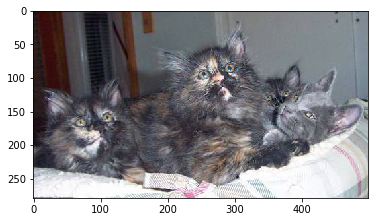

In [27]:
with Image.open('train/cat/cat.3201.jpg') as img:
  plt.imshow(img)

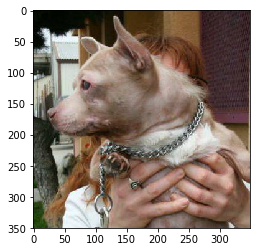

In [28]:
with Image.open('train/dog/dog.2742.jpg') as img:
  plt.imshow(img)